# 100M band = 80

1
2
3
[False False False ... False False False]


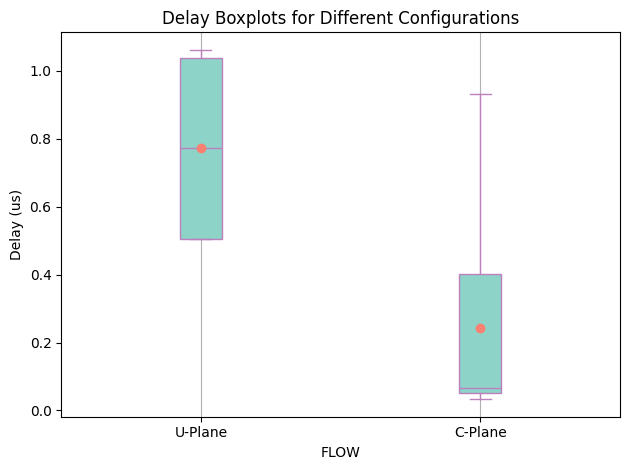

Mean Delay for U-Plane: 0.7720062219918861 us
Mean Delay for C-Plane: 0.24348960130859934 us


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/PruebaPrio3/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
# plt.stem(delay_us[1], label="U-Plane", linefmt="go")
# plt.stem(delay_us[1][1200:1500], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
2
[False False False ... False False False]


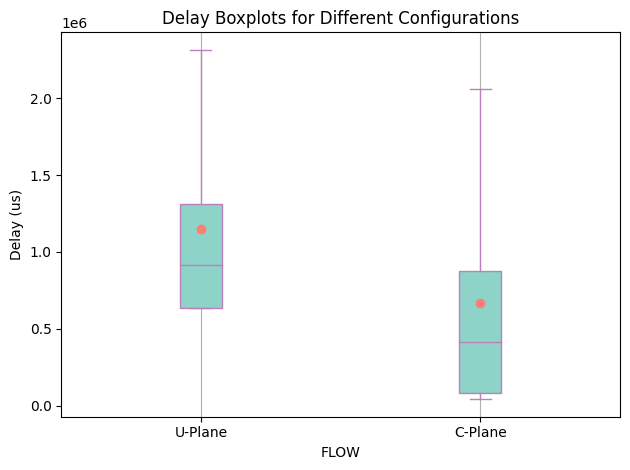

Mean Delay for U-Plane: 1148862.7450980393 us
Mean Delay for C-Plane: 665725.5874365332 us


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Prueba/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 2
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
fmt=["bo", "go", "yo"]
delay_control = []
delay_user = []
for flow in Flows:
    # Read data into pandas DataFrames
 
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        delay_rt = []
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt.append( Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len])

        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(np.concatenate(delay_rt))
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, '# Pkt')

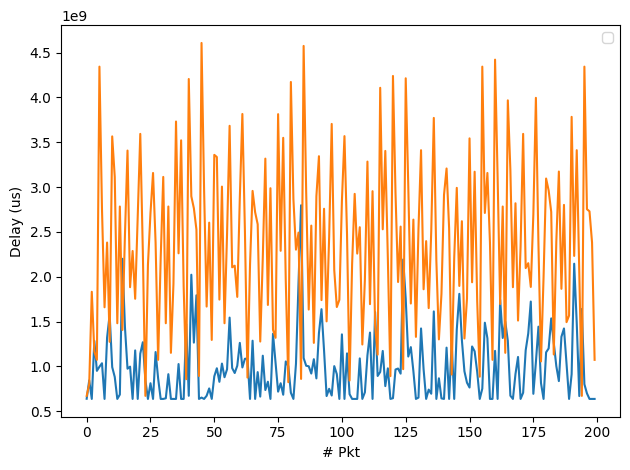

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


plt.plot(delay_user[0][0:200])
plt.plot(delay_user[1][0:200])

# plt.stem(delay_us[1][1200:1500], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

Text(0.5, 0, '# Pkt')

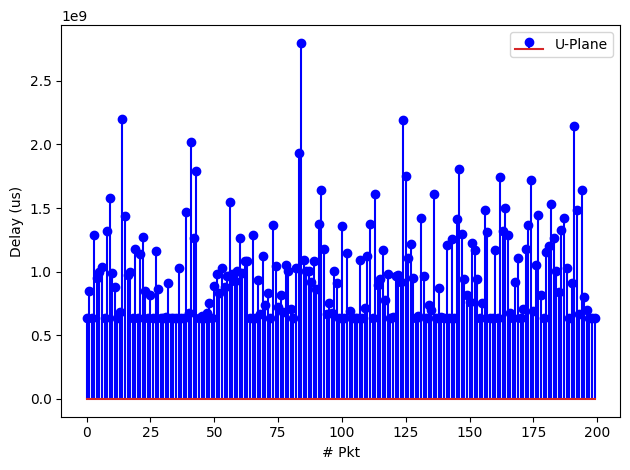

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_user[0][0:200], label="U-Plane", linefmt="bo")
# plt.stem(delay_user[1][0:200], label="U-Plane", linefmt="go")
# plt.stem(delay_us[1], label="C-Plane", linefmt="go")
# plt.stem(delay_us[1][1200:1500], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
[False False False ... False False False]


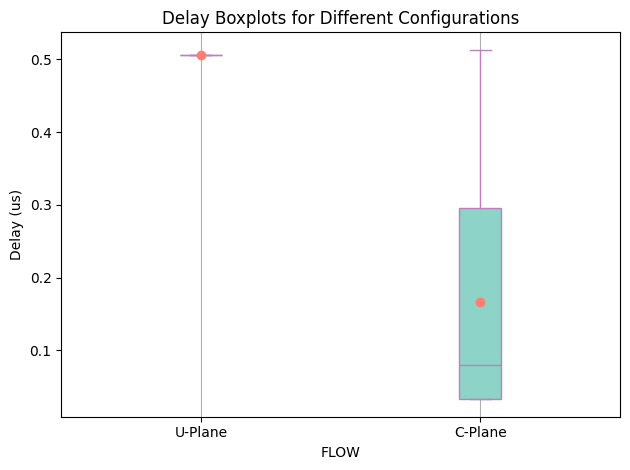

Mean Delay for U-Plane: 0.5060023136072392 us
Mean Delay for C-Plane: 0.1659596910622393 us


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/PruebaPrio1/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 1
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




Text(0.5, 0, '# Pkt')

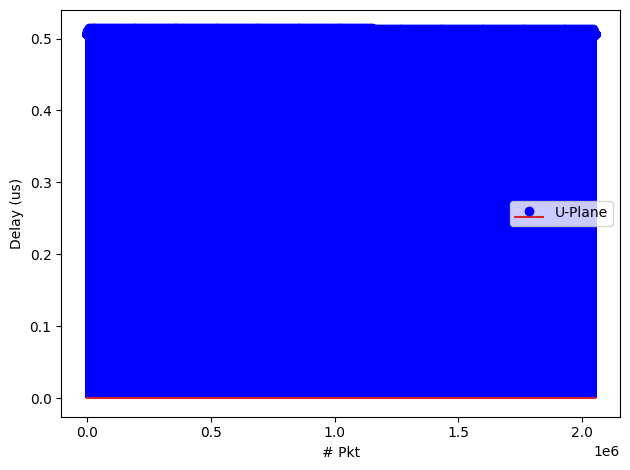

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
# plt.stem(delay_us[1][1200:1500], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/prueba1/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane", "RT1"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




1


FileNotFoundError: [Errno 2] No such file or directory: './sim_results/prueba1/TxFileControl1.log'

Text(0.5, 0, '# Pkt')

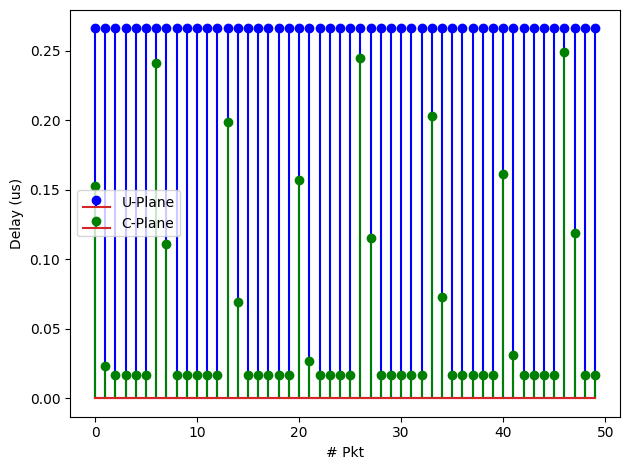

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0][0:50], label="U-Plane", linefmt="bo")
plt.stem(delay_us[1][0:50], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
2
3
[False False False ... False False False]


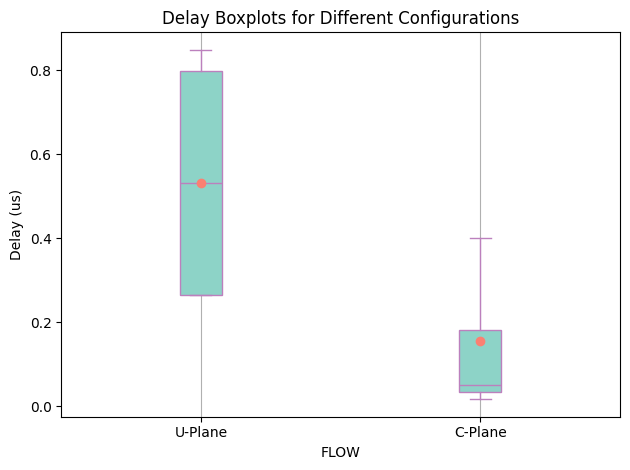

Mean Delay for U-Plane: 0.532027572940045 us
Mean Delay for C-Plane: 0.15620362381363248 us


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Pruebas/prueba3/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
plt.stem(delay_us[1], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

: 

1
2
3
[False False False ... False False False]


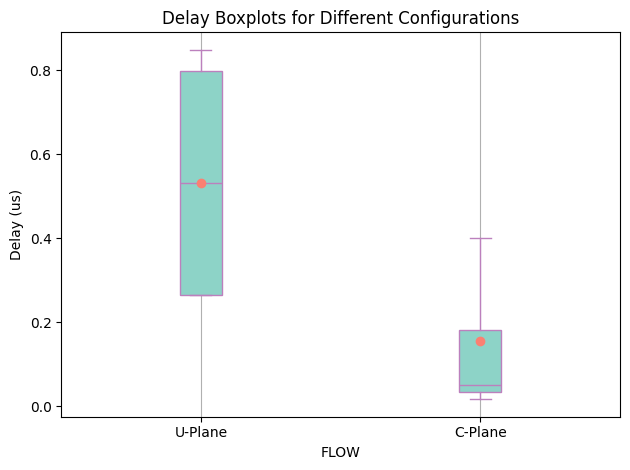

Mean Delay for U-Plane: 0.532027572940045 us
Mean Delay for C-Plane: 0.15620362381363248 us


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/prueba1/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

            # Calculate delay for user and control configurations
            delay_user.append(URx["Time"].values - UTx["Time"].values)
            delay_control.append(CRx["Time"].values - CTx["Time"].values)
            # Assign values to the corresponding columns in the delay DataFrame
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




Text(0.5, 0, '# Pkt')

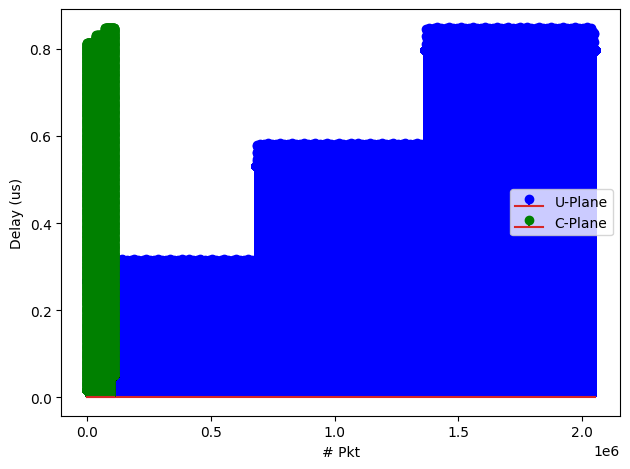

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0], label="U-Plane", linefmt="bo")
plt.stem(delay_us[1], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

1
2
3
[False False False ... False False False]


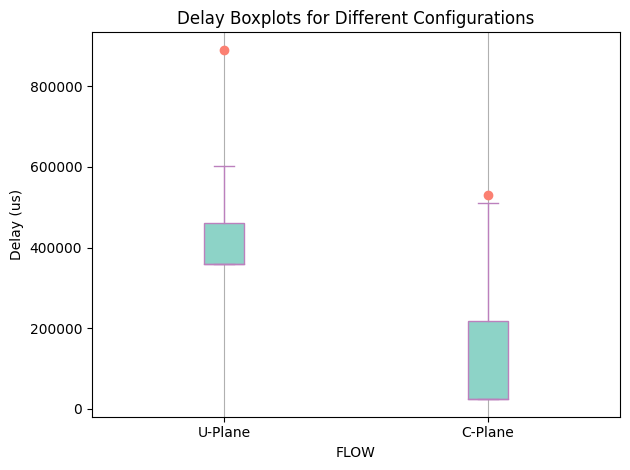

Mean Delay for U-Plane: 890186.61852918 us
Mean Delay for C-Plane: 529880.9072729186 us


In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Prueba/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 1
RU = 3
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = [] 
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        for ru in Ru:
            print(ru)
            CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

           # Calculate delay for user and control configurations
            min_len = min(len(UTx), len(URx))
            delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
            min_len = min(len(CTx), len(CRx))
            delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            
        delay.append(np.concatenate(delay_user))
        delay.append(np.concatenate(delay_control))
        print(delay_control[0] == 0)
    else: 
        for num in AAUs:
            Tx = pd.read_csv(f"{folder}TxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num + 12*flow}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt = Rx["Time"].values[:min_len] - Tx["Time"].values[:min_len]

            # Assign values to the corresponding columns in the delay DataFrame
            delay.append(delay_rt)
    

# Boxplot with enhanced style
delay_us = [arr*1e-3 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




In [14]:
lambda_arrival = (4.5*1e9/8)/(1464+28)

service_time = ((1464+28)*8)/(45*1e9)
print(lambda_arrival)
print(service_time)
rho  = lambda_arrival/service_time

print(rho)



377010.7238605898
2.652444444444444e-07
1421370859058.8591


Nothing
RT


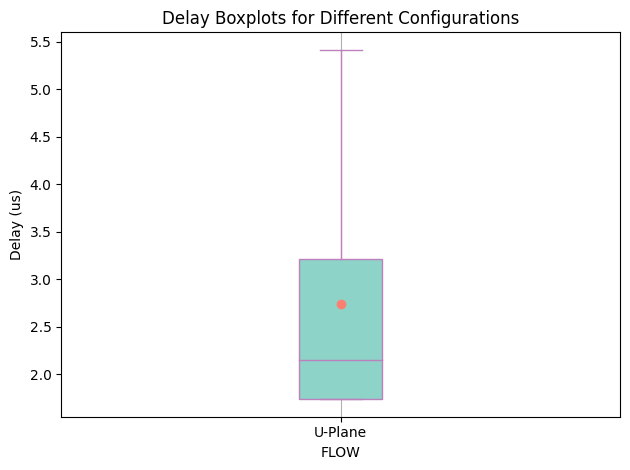

Mean Delay for U-Plane: 2.7410276888469625 us


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Prueba/"
plt.rcParams["figure.autolayout"] = True


Flow_max_value = 2
RU = 0
Step = 1
configs_txt = ["U-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 2, 1)
Nsim = 1
delay = []
delay_aux = [] 
delay_rt = []
for flow in Flows:
    # Read data into pandas DataFrames
    delay_control = []
    delay_aux = []
    delay_user = []
    if flow == 1:
        print("Nothing")
        # for ru in Ru:
        #     print(ru)
        #     CTx = pd.read_csv(f"{folder}TxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
        #     UTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
        #     CRx = pd.read_csv(f"{folder}RxFileControl{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
        #     URx = pd.read_csv(f"{folder}RxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])

        #    # Calculate delay for user and control configurations
        #     min_len = min(len(UTx), len(URx))
        #     delay_user.append(URx["Time"].values[:min_len] - UTx["Time"].values[:min_len])
        #     min_len = min(len(CTx), len(CRx))
        #     delay_control.append(CRx["Time"].values[:min_len] - CTx["Time"].values[:min_len])
            
        # delay.append(np.concatenate(delay_user))
        # delay.append(np.concatenate(delay_control))
        # print(delay_control[0] == 0)
    else: 
        print("RT")
        for num in AAUs:
            # print(f"Num AAU flow{num}")
            Tx = pd.read_csv(f"{folder}TxFile{num-1 + num*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            Rx = pd.read_csv(f"{folder}RxFile{num-1 + num*(flow-2)}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
            # Ensure that the length of 'Tx' matches the length of 'Rx'
            min_len = min(len(Tx), len(Rx))
            delay_rt.append( Rx["Time"].values[:(min_len-1)] - Tx["Time"].values[:(min_len-1)])

        # Assign values to the corresponding columns in the delay DataFrame
        delay.append(np.concatenate(delay_rt))
    

# Boxplot with enhanced style
delay_us = [arr*1e-9 for arr in delay]    
bp = plt.boxplot(
    delay_us,
    labels=configs_txt,
    showmeans=True,
    showfliers=False,
    patch_artist=True,  # fill with color
    boxprops=dict(facecolor=colors[0], color=colors[9]),
    capprops=dict(color=colors[9]),
    whiskerprops=dict(color=colors[9]),
    flierprops=dict(markeredgecolor=colors[9], markerfacecolor=colors[9]),
    medianprops=dict(color=colors[9]),
    meanprops=dict(marker="o", markerfacecolor=colors[3], markeredgecolor=colors[3]),
)

# Customize labels and title
plt.ylabel("Delay (us)")
plt.xlabel("FLOW")
plt.title("Delay Boxplots for Different Configurations")

# Add gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid()
plt.show()

# Extracting mean delay values from the boxplot object
mean_delays = [item.get_ydata()[0] for item in bp['means']]

# Printing mean delay for each configuration
for config, mean_delay in zip(configs_txt, mean_delays):
    print(f"Mean Delay for {config}: {mean_delay} us")




Text(0.5, 0, '# Pkt')

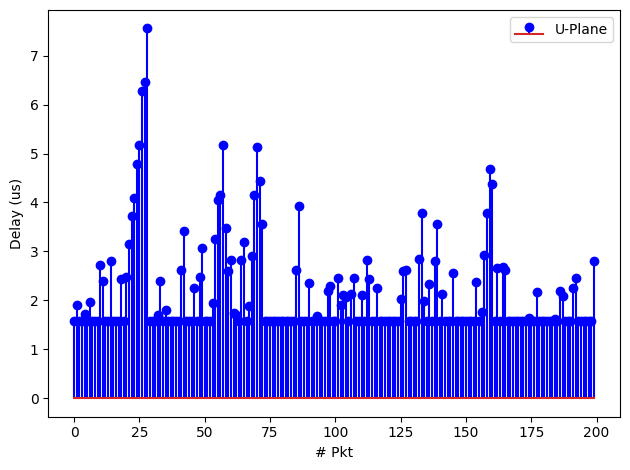

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  


# plt.plot(delay_us[0][0:200])
plt.stem(delay_us[0][0:200], label="U-Plane", linefmt="bo")
# plt.stem(delay_us[1], label="C-Plane", linefmt="go")
plt.legend()
plt.ylabel("Delay (us)")
plt.xlabel("# Pkt")

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random
# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Prueba/"
plt.rcParams["figure.autolayout"] = True

Flow_max_value = 1
RU = 1
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = []
delta = 1
T = 50

for ru in Ru:
    # CTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    CTx = pd.read_csv(f"{folder}RxFile{ru-1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    Tsimulation = CTx["Time"].iloc[-1] * 1e-9
    print(Tsimulation)

    # Initialize variables
    taux = 0
    max_events = 1000  # Adjust this value based on your expectation
    distribution = np.zeros(max_events + 1)

    while (taux + T <= Tsimulation):
        ttop = taux + T
        vector = CTx[(taux < CTx['Time'] * 1e-9) & (CTx['Time'] * 1e-9 <= ttop)]
        num = len(vector)
        if num <= max_events:
            distribution[num] += 1
        taux += delta

    total = sum(distribution)
    distribution_normalized = distribution / total

    # Plot distribution
    print(len(distribution_normalized))
    plt.plot(np.arange(len(distribution_normalized)), distribution_normalized)





plt.show()


2999998.56


KeyboardInterrupt: 

1001


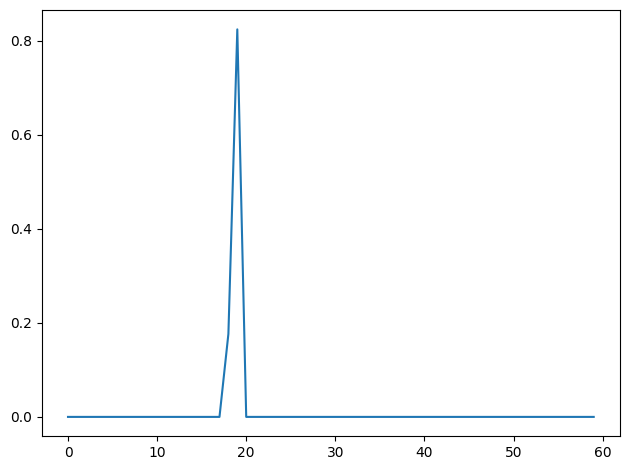

In [19]:
total = sum(distribution)
distribution_normalized = distribution / total

# Plot distribution
print(len(distribution_normalized))
plt.plot(np.arange(60), distribution_normalized[0:60])

2999999.597


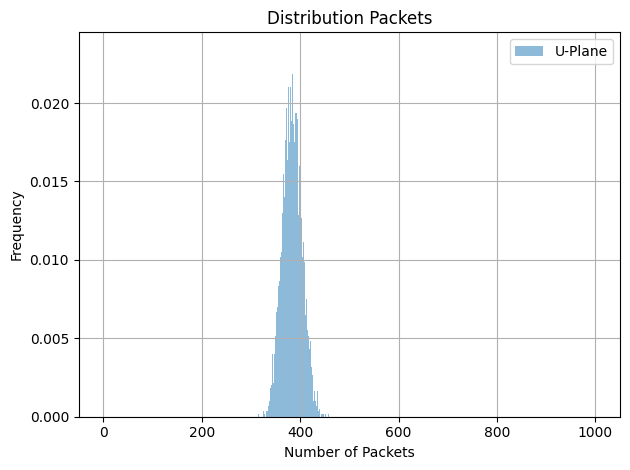

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a custom color palette
colors = plt.cm.Set3.colors

folder = "./sim_results/Prueba/"
plt.rcParams["figure.autolayout"] = True

Flow_max_value = 1
RU = 1
Step = 1
configs_txt = ["U-Plane", "C-Plane"]
Flows = np.arange(1, Flow_max_value + Step, Step)
Ru = np.arange(1, RU + Step, Step)
AAUs = np.arange(1, 13, 1)
Nsim = 1
delay = []
delay_aux = []
delta = 500
T = 1000

for ru in Ru:
    # CTx = pd.read_csv(f"{folder}TxFileUser{ru}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    CTx = pd.read_csv(f"{folder}RxFile{ru-1}.log", sep='\s+', header=None, names=["pkid", "Time", "Value"])
    Tsimulation = CTx["Time"].iloc[-1] * 1e-9
    print(Tsimulation)

    # Initialize variables
    taux = 0
    max_events = 1000  # Adjust this value based on your expectation
    distribution = np.zeros(max_events + 1)

    while (taux + T <= Tsimulation):
        ttop = taux + T
        vector = CTx[(taux < CTx['Time'] * 1e-9) & (CTx['Time'] * 1e-9 <= ttop)]
        num = len(vector)
        if num <= max_events:
            distribution[num] += 1
        taux += delta

    total = sum(distribution)
    distribution_normalized = distribution / total

    # Plot distribution as histogram
    plt.hist(np.arange(len(distribution_normalized)), weights=distribution_normalized, bins=len(distribution_normalized), alpha=0.5, label=configs_txt[ru-1])

plt.xlabel('Number of Packets')
plt.ylabel('Frequency')
plt.title('Distribution Packets')
plt.legend()
plt.grid(True)
plt.show()
